# Planar Robot Toytask Demo
This Python Notebook showcases the use of ML-Cur with contextual robot toytask.
This toytask consists of joint configuration for a 10DoF Robotic arm in a 2D plane. The environment exhibists three obstacles, which the robot must avoid.
Each demonstration is contextualized by a 2D target coordinate.

[4.99515716 3.12636855]


<AxesSubplot:title={'center':'Training Data'}>

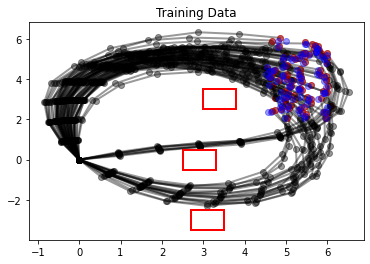

In [14]:
from planar_robot_demo import planar_dataset
from planar_robot_demo import planar_vis

train_contexts, train_samples, test_contexts, _ = planar_dataset.planar_train_test()
planar_vis.visualize(train_samples[::20], train_contexts[::20], title="Training Data")

## EM Baseline

In [15]:
from ml_cur import EmLinEmm

em_lin_emm = EmLinEmm(n_components=2, train_iter=20)
em_lin_emm.fit(train_samples, train_contexts)

With the EM baseline, we can see the mode averaging. In this environment this could potentially have devastating effects, as the robot crashes into the obstacles. It is also unbale to reach its target destinations.

[5.23990427 4.60723775]


<AxesSubplot:title={'center':'EM Baseline'}>

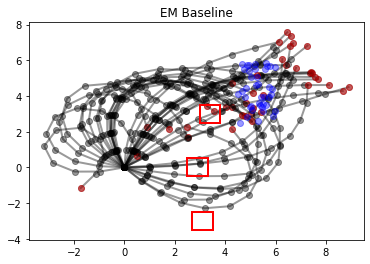

In [16]:
em_predictions = em_lin_emm.sample(test_contexts)
planar_vis.visualize(em_predictions[::5], test_contexts[::5], title="EM Baseline")

## ML-Cur Model

In [17]:
from ml_cur import MlCurLinMoe

ml_cur_moe = MlCurLinMoe(n_components=2, train_iter=20, num_active_samples=0.1)
ml_cur_moe.fit(train_samples, train_contexts)

[5.23990427 4.60723775]


<AxesSubplot:title={'center':'Ml-Cur Model'}>

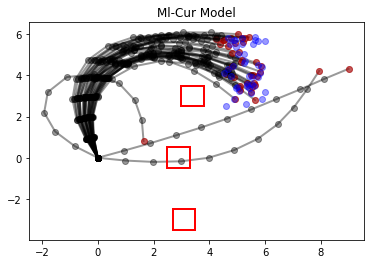

In [18]:
ml_cur_predicitons = ml_cur_moe.sample(test_contexts)
planar_vis.visualize(ml_cur_predicitons[::5], test_contexts[::5], title="Ml-Cur Model")